In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



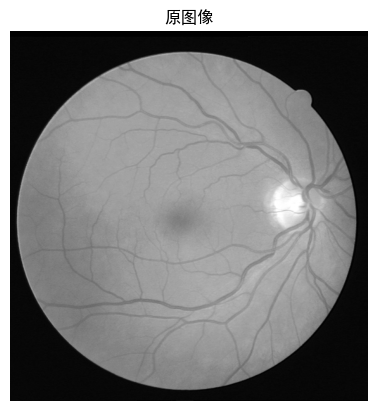

In [4]:
from matplotlib import rcParams
# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 指定黑体（或其他支持中文的字体）
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 加载图像（确保路径正确）
# 加载图像
image = cv2.imread('IMG/C.png', cv2.IMREAD_GRAYSCALE)
# 显示结果
plt.imshow(image, cmap='gray')
plt.title('原图像')
plt.axis('off')
plt.show()


In [5]:
# 步骤 1: 图像预处理 - 使用伽马变换增强血管区域
gamma = 0.5  # 伽马值可以根据需要调整
gamma_transformed = np.power(image / 255.0, gamma) * 255
gamma_transformed = np.uint8(gamma_transformed)

# 步骤 2: 使用 Sobel 算子进行边缘检测
sobel_x = cv2.Sobel(gamma_transformed, cv2.CV_64F, 1, 0, ksize=3)  # 水平梯度
sobel_y = cv2.Sobel(gamma_transformed, cv2.CV_64F, 0, 1, ksize=3)  # 垂直梯度
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# 将幅值归一化到 0-255 范围
sobel_edges = np.uint8(np.abs(sobel_edges))

# 步骤 3: 二值化处理
_, binary_edges = cv2.threshold(sobel_edges, 50, 255, cv2.THRESH_BINARY)

# 步骤 4: 形态学操作 - 膨胀操作增强血管结构
kernel = np.ones((5, 5), np.uint8)  # 结构元素
dilated_image = cv2.dilate(binary_edges, kernel, iterations=1)


In [6]:
# 步骤 1: 图像预处理 - 使用伽马变换增强血管区域
gamma = 0.5  # 伽马值可以根据需要调整
gamma_transformed = np.power(image / 255.0, gamma) * 255
gamma_transformed = np.uint8(gamma_transformed)

# 步骤 2: 使用 Sobel 算子进行边缘检测
sobel_x = cv2.Sobel(gamma_transformed, cv2.CV_64F, 1, 0, ksize=3)  # 水平梯度
sobel_y = cv2.Sobel(gamma_transformed, cv2.CV_64F, 0, 1, ksize=3)  # 垂直梯度
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# 将幅值归一化到 0-255 范围
sobel_edges = np.uint8(np.abs(sobel_edges))

# 步骤 3: 二值化处理
_, binary_edges = cv2.threshold(sobel_edges, 50, 255, cv2.THRESH_BINARY)

# 步骤 4: 形态学操作 - 膨胀操作增强血管结构
kernel = np.ones((5, 5), np.uint8)  # 结构元素
dilated_image = cv2.dilate(binary_edges, kernel, iterations=1)


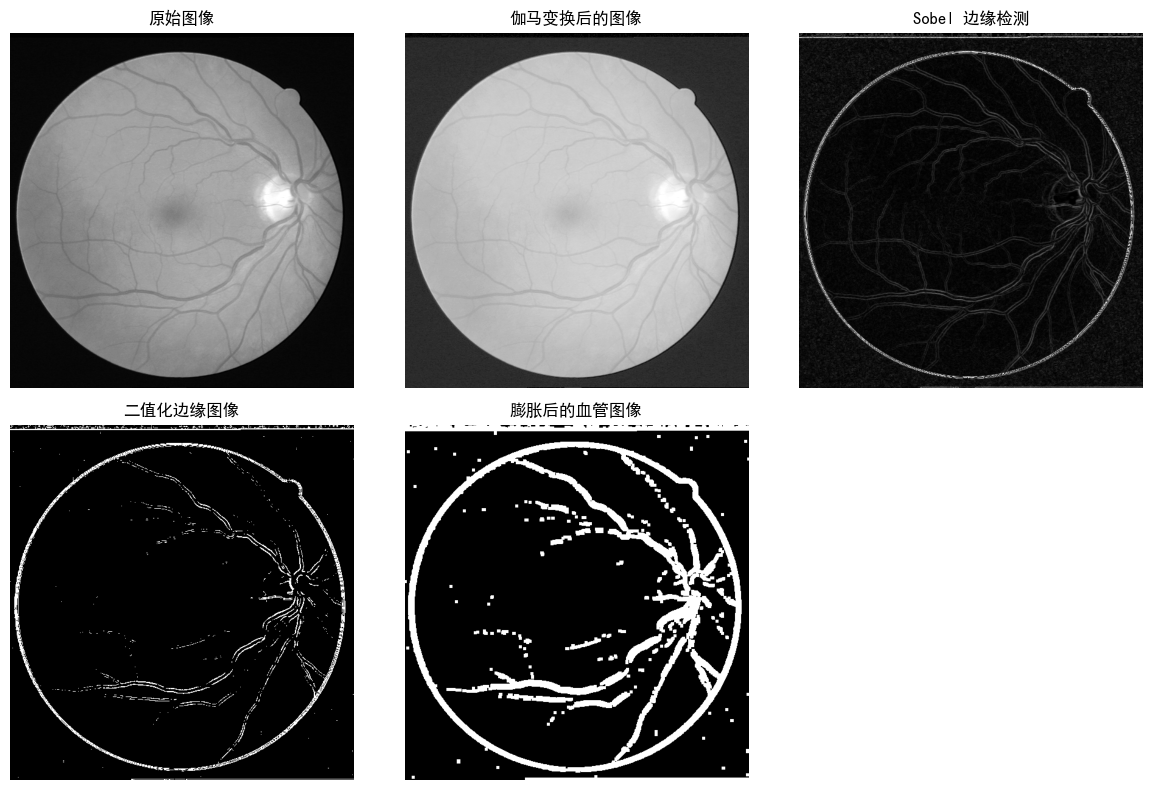

In [7]:
# 步骤 5: 显示结果
plt.figure(figsize=(12, 8))

# 原始图像
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

# 伽马变换后的图像
plt.subplot(2, 3, 2)
plt.imshow(gamma_transformed, cmap='gray')
plt.title('伽马变换后的图像')
plt.axis('off')

# Sobel 边缘检测结果
plt.subplot(2, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel 边缘检测')
plt.axis('off')

# 二值化后的边缘图像
plt.subplot(2, 3, 4)
plt.imshow(binary_edges, cmap='gray')
plt.title('二值化边缘图像')
plt.axis('off')

# 膨胀后的血管图像
plt.subplot(2, 3, 5)
plt.imshow(dilated_image, cmap='gray')
plt.title('膨胀后的血管图像')
plt.axis('off')

plt.tight_layout()
plt.show()